# Comparison of random number generators

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

BINS = 100

### 1. Linear Congruential (Standard C library)

In [2]:
linear_congruential = pd.read_csv("data/decimal/linear_congruential.csv")
linear_congruential.describe()

,Linear Congruential Numbers
count,10000.000000
mean,0.497132
std,0.288280
min,0.000047
25%,0.248496
50%,0.495975
75%,0.745157
max,0.999994


### 2. Mersenne-Twister (Python's random)

In [3]:
mersenne_twister = pd.read_csv("data/decimal/mersenne_twister.csv")
mersenne_twister.describe()

,Mersenne-Twister Numbers
count,10000.000000
mean,0.496124
std,0.287951
min,0.000018
25%,0.244175
50%,0.493514
75%,0.745540
max,0.999974


### 3. True random numbers (random.org)

In [4]:
true_random = pd.read_csv("data/decimal/true_random.csv")
true_random.describe()

,True Random Numbers
count,10000.000000
mean,0.506704
std,0.291087
min,0.000067
25%,0.257339
50%,0.507268
75%,0.759801
max,0.999876


## Histograms

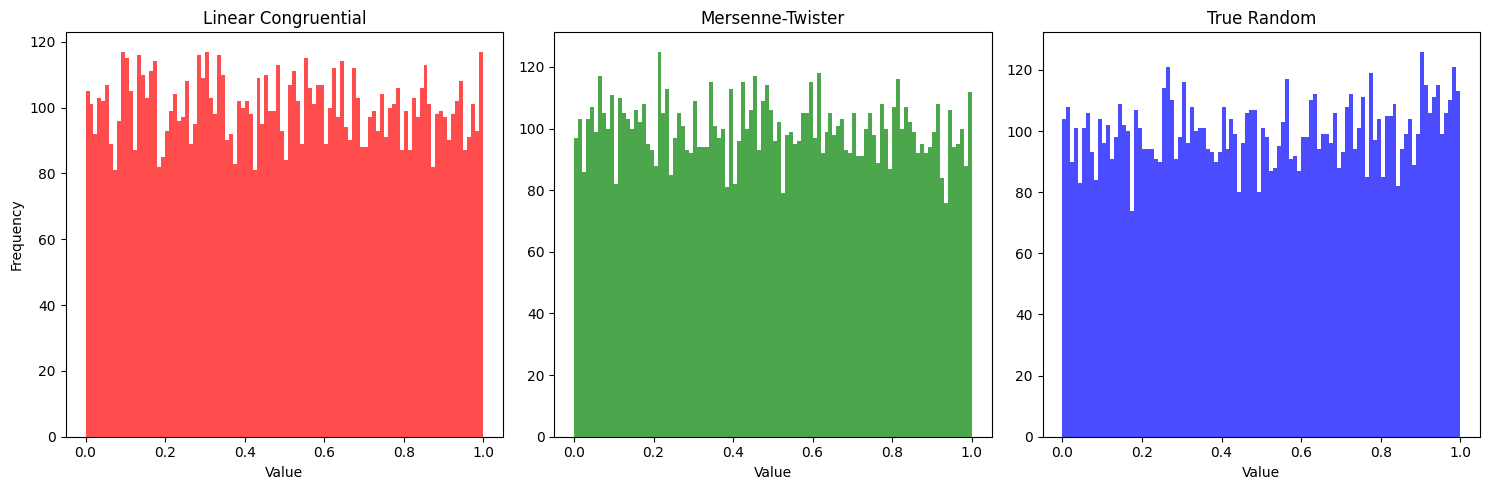

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(linear_congruential, bins=BINS, color='red', alpha=0.7)
plt.title('Linear Congruential')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mersenne_twister, bins=BINS, color='green', alpha=0.7)
plt.title('Mersenne-Twister')
plt.xlabel('Value')

plt.subplot(1, 3, 3)
plt.hist(true_random, bins=BINS, color='blue', alpha=0.7)
plt.title('True Random')
plt.xlabel('Value')

plt.tight_layout()
plt.savefig("imgs/hist_decimal.png")

## Student's t-Test

In [6]:
ttest1 = stats.ttest_ind(linear_congruential, true_random)
print(f"Linear Congruential vs True Random: t = {ttest1.statistic[0]:.3f}, p = {ttest1.pvalue[0]:.3f}")

ttest2 = stats.ttest_ind(mersenne_twister, true_random)
print(f"Mersenne-Twister vs True Random: t = {ttest2.statistic[0]:.3f}, p = {ttest2.pvalue[0]:.3f}")

ttest3 = stats.ttest_ind(linear_congruential, mersenne_twister)
print(f"Linear Congruential vs Mersenne-Twister: t = {ttest3.statistic[0]:.3f}, p = {ttest3.pvalue[0]:.3f}")

Linear Congruential vs True Random: t = -2.336, p = 0.019
Mersenne-Twister vs True Random: t = -2.584, p = 0.010
Linear Congruential vs Mersenne-Twister: t = 0.247, p = 0.805
